In [1]:
from sklearn import svm, model_selection
from sklearn import metrics
from sklearn.preprocessing import normalize
import json
import itertools
import utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = model_selection.GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [3]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [4]:
DATASET_NAME = '../../json_final/generated/baseline'
test_set = utils.load_from_json('%s_test.json' % DATASET_NAME)
train_set = utils.load_from_json('%s_train_hq.json' % DATASET_NAME)
candidates_limited = utils.load_from_json('%s_candidates_limited.json' % DATASET_NAME)
candidates = utils.load_from_json('%s_candidates.json' % DATASET_NAME)

print('Loaded test dataset with %i classes:' % len(test_set))
for klass, sounds in test_set.items():
    print('\t%s: %i sounds' % (klass, len(sounds)))
print('Loaded train dataset with %i classes:' % len(train_set))
for klass, sounds in train_set.items():
    print('\t%s: %i sounds' % (klass, len(sounds)))
print('Loaded candidates_limited with %i classes:' % len(candidates_limited))
for klass, sounds in candidates_limited.items():
    print('\t%s: %i sounds' % (klass, len(sounds)))
print('Loaded candidates with %i classes:' % len(candidates))
for klass, sounds in candidates.items():
    print('\t%s: %i sounds' % (klass, len(sounds)))
class_names = list(candidates.keys())

Loaded test dataset with 13 classes:
	Coin (dropping): 46 sounds
	Cupboard open or close: 27 sounds
	Door: 40 sounds
	Drawer open or close: 49 sounds
	Keys jangling: 52 sounds
	Microwave oven: 36 sounds
	Packing tape, duct tape: 35 sounds
	Scissors: 52 sounds
	Toilet flush: 66 sounds
	Typing: 64 sounds
	Vacuum cleaner: 44 sounds
	Writing: 71 sounds
	Zipper (clothing): 49 sounds
Loaded train dataset with 13 classes:
	Coin (dropping): 80 sounds
	Cupboard open or close: 64 sounds
	Door: 101 sounds
	Drawer open or close: 67 sounds
	Keys jangling: 70 sounds
	Microwave oven: 62 sounds
	Packing tape, duct tape: 60 sounds
	Scissors: 74 sounds
	Toilet flush: 90 sounds
	Typing: 89 sounds
	Vacuum cleaner: 58 sounds
	Writing: 76 sounds
	Zipper (clothing): 83 sounds
Loaded candidates_limited with 13 classes:
	Coin (dropping): 300 sounds
	Cupboard open or close: 247 sounds
	Door: 300 sounds
	Drawer open or close: 258 sounds
	Keys jangling: 300 sounds
	Microwave oven: 285 sounds
	Packing tape, duct t

In [5]:
#for key in candidates.keys():
#    for i in range(len(candidates[key])):
#        train_set[key].append(candidates[key][i])

In [6]:
class_names

['Coin (dropping)',
 'Cupboard open or close',
 'Door',
 'Drawer open or close',
 'Keys jangling',
 'Microwave oven',
 'Packing tape, duct tape',
 'Scissors',
 'Toilet flush',
 'Typing',
 'Vacuum cleaner',
 'Writing',
 'Zipper (clothing)']

In [7]:
# CODE TO CLEAN DATASET (remove sounds which do not have analysis information)
test_cleaned = {}
for key, sounds in test_set.items():
    if key not in test_cleaned:
        test_cleaned[key] = []
    for sound in sounds:
        if sound['analysis'] is not None:
            test_cleaned[key].append(sound)
train_cleaned = {}
for key, sounds in train_set.items():
    if key not in train_cleaned:
        train_cleaned[key] = []
    for sound in sounds:
        if sound['analysis'] is not None:
            train_cleaned[key].append(sound)
candidates_cleaned = {}
for key, sounds in candidates.items():
    if key not in candidates_cleaned:
        candidates_cleaned[key] = []
    for sound in sounds:
        if sound['analysis'] is not None:
            candidates_cleaned[key].append(sound)

In [8]:
def build_feature_vector(sound):
    features = []
    #add control if they have it or not
    if (sound['analysis']):
        mfcc_1 = sound['analysis']['lowlevel']['mfcc']['mean'][1]
        mfcc_1_1 = sound['analysis']['lowlevel']['mfcc']['dmean'][1]
        mfcc_2 = sound['analysis']['lowlevel']['mfcc']['mean'][2]
        mfcc_2_1 = sound['analysis']['lowlevel']['mfcc']['dmean'][2]
        mfcc_3 = sound['analysis']['lowlevel']['mfcc']['mean'][3]
        mfcc_3_1 = sound['analysis']['lowlevel']['mfcc']['dmean'][3]
        mfcc_4 = sound['analysis']['lowlevel']['mfcc']['mean'][4]
        mfcc_4_1 = sound['analysis']['lowlevel']['mfcc']['dmean'][4]
        mfcc_5 = sound['analysis']['lowlevel']['mfcc']['mean'][5]
        mfcc_5_1 = sound['analysis']['lowlevel']['mfcc']['dmean'][5]
        mfcc_6 = sound['analysis']['lowlevel']['mfcc']['mean'][6]
        mfcc_6_1 = sound['analysis']['lowlevel']['mfcc']['dmean'][6]
        mfcc_7 = sound['analysis']['lowlevel']['mfcc']['mean'][7]
        mfcc_7_1 = sound['analysis']['lowlevel']['mfcc']['dmean'][7]
        mfcc_8 = sound['analysis']['lowlevel']['mfcc']['mean'][8]
        mfcc_8_1 = sound['analysis']['lowlevel']['mfcc']['dmean'][8]
        mfcc_9 = sound['analysis']['lowlevel']['mfcc']['mean'][9]
        mfcc_9_1 = sound['analysis']['lowlevel']['mfcc']['dmean'][9]
        mfcc_10 = sound['analysis']['lowlevel']['mfcc']['mean'][10]
        mfcc_10_1 = sound['analysis']['lowlevel']['mfcc']['dmean'][10]
        mfcc_11 = sound['analysis']['lowlevel']['mfcc']['mean'][11]
        mfcc_11_1 = sound['analysis']['lowlevel']['mfcc']['dmean'][11]
        mfcc_12 = sound['analysis']['lowlevel']['mfcc']['mean'][12]
        mfcc_12_1 = sound['analysis']['lowlevel']['mfcc']['dmean'][12]

        #feature vector creation
        features = np.concatenate([[], features, np.array([mfcc_1])])
        features = np.concatenate([[], features, np.array([mfcc_1_1])])
        features = np.concatenate([[], features, np.array([mfcc_2])])
        features = np.concatenate([[], features, np.array([mfcc_2_1])])
        features = np.concatenate([[], features, np.array([mfcc_3])])
        features = np.concatenate([[], features, np.array([mfcc_3_1])])
        features = np.concatenate([[], features, np.array([mfcc_4])])
        features = np.concatenate([[], features, np.array([mfcc_4_1])])
        features = np.concatenate([[], features, np.array([mfcc_5])])
        features = np.concatenate([[], features, np.array([mfcc_5_1])])
        features = np.concatenate([[], features, np.array([mfcc_6])])
        features = np.concatenate([[], features, np.array([mfcc_6_1])])
        features = np.concatenate([[], features, np.array([mfcc_7])])
        features = np.concatenate([[], features, np.array([mfcc_7_1])])
        features = np.concatenate([[], features, np.array([mfcc_8])])
        features = np.concatenate([[], features, np.array([mfcc_8_1])])
        features = np.concatenate([[], features, np.array([mfcc_9])])
        features = np.concatenate([[], features, np.array([mfcc_9_1])])
        features = np.concatenate([[], features, np.array([mfcc_10])])
        features = np.concatenate([[], features, np.array([mfcc_10_1])])
        features = np.concatenate([[], features, np.array([mfcc_11])])
        features = np.concatenate([[], features, np.array([mfcc_11_1])])
        features = np.concatenate([[], features, np.array([mfcc_12])])
        features = np.concatenate([[], features, np.array([mfcc_12_1])])
    else:
        print(str(sound['id']) + ": has no analysis")
        #this is wrong but should never happen because we clean the dataset(only for debug)
        features = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    return features

In [9]:
# Prepare data for fitting classifier (as sklearn classifiers require)
y_test = list()
X_test = list()
for class_name, sounds in test_cleaned.items():
    for count, sound in enumerate(sounds):
        # Use index of class name in class_names as numerical value (classifier internally represents
        # class label as number)
        y_test.append(class_names.index(class_name))
        feature_vector = build_feature_vector(sound)
        X_test.append(np.array(feature_vector))
        
# Prepare data for fitting classifier (as sklearn classifiers require)
y_train = list()
X_train = list()
for class_name, sounds in train_cleaned.items():
    for count, sound in enumerate(sounds):
        # Use index of class name in class_names as numerical value (classifier internally represents
        # class label as number)
        y_train.append(class_names.index(class_name))
        feature_vector = build_feature_vector(sound)
        X_train.append(np.array(feature_vector))
        
X_candidates = list()
y_candidates = list()
names_candidates = list()
for class_name, sounds in candidates_cleaned.items():
    for count, sound in enumerate(sounds):
        # Use index of class name in class_names as numerical value (classifier internally represents
        # class label as number)
        y_candidates.append(class_names.index(class_name))
        feature_vector = build_feature_vector(sound)
        X_candidates.append(np.array(feature_vector))
        names_candidates.append(str(sound['id']) + '.wav')

In [10]:
#normalize features
#X_normalized = normalize(X)

#with normalization it performs worse!!

In [11]:
#X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3)

In [12]:
#svc_param_selection(X, y, 10)

In [13]:
classifier = svm.SVC(C=10, gamma=0.001, probability=True)
classifier.fit(X_train, y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [14]:
cand_df = pd.DataFrame(X_candidates)

In [15]:
#cand_df

In [16]:
cand_df.iloc[[13]]

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
13,-30.044424,20.820919,46.53217,16.868565,7.180081,11.117304,33.078121,12.058279,6.059188,11.46988,...,0.946339,7.067525,9.783814,7.624341,2.216909,9.070163,7.946582,6.289833,0.885378,8.10292


In [17]:
a = classifier.predict_proba(cand_df.iloc[[0]])
for i in range(len(cand_df) - 1):
    a = np.vstack((a, classifier.predict_proba(cand_df.iloc[[i+1]])))

a is the matrix of probabilities. Now i need to attach the y as last column and sort for each category (I will have a matrix for each category (don't know if it is the most efficient but it's ok for now)) 

In [18]:
a = np.c_[a, names_candidates]

In [19]:
a = np.c_[a, y_candidates]

In [20]:
a.shape

(6215, 15)

In [21]:
a[0]

array(['0.5110024919098499', '0.043981989839354724', '0.08294705179593752',
       '0.009405032979009416', '0.0744122378441374',
       '0.030108685689942905', '0.02750453412798145',
       '0.030088990422405416', '0.030192474074729192',
       '0.04906737276827632', '0.033272181102652044',
       '0.043742139326782455', '0.03427481811894087', '341408.wav', '0'],
      dtype='<U32')

In [22]:
columns = ['Coin (dropping)',
  'Cupboard open or close',
  'Door',
  'Drawer open or close',
  'Keys jangling',
  'Microwave oven',
  'Packing tape, duct tape',
  'Scissors',
  'Toilet flush',
  'Typing',
  'Vacuum cleaner',
  'Writing',
  'Zipper (clothing)',
 'filename',
 'result']

In [23]:
columns

['Coin (dropping)',
 'Cupboard open or close',
 'Door',
 'Drawer open or close',
 'Keys jangling',
 'Microwave oven',
 'Packing tape, duct tape',
 'Scissors',
 'Toilet flush',
 'Typing',
 'Vacuum cleaner',
 'Writing',
 'Zipper (clothing)',
 'filename',
 'result']

In [24]:
a_df = pd.DataFrame(a, columns=columns)

In [25]:
a_df.values[0]

array(['0.5110024919098499', '0.043981989839354724', '0.08294705179593752',
       '0.009405032979009416', '0.0744122378441374',
       '0.030108685689942905', '0.02750453412798145',
       '0.030088990422405416', '0.030192474074729192',
       '0.04906737276827632', '0.033272181102652044',
       '0.043742139326782455', '0.03427481811894087', '341408.wav', '0'], dtype=object)

In [26]:
#result = a_df.sort_values(['Cupboard open or close'], ascending=[False])

In [27]:
counter = np.zeros(13)
j = 0
for k in class_names:
    a_df[k] = a_df[k].astype(float).fillna(0.0)
    b_df = a_df.loc[a_df[k] > 0.4]
    #b_df['result'] = class_names.index(k)
    result = b_df.join(cand_df)
    result = result[np.arange(24)]
    for i in range(len(result)):
        X_train.append(result.values[i])
        y_train.append(class_names.index(k))
        counter[j] = counter[j] + 1
    j = j + 1

In [28]:
counter

array([ 299.,    4.,   25.,  119.,  146.,   61.,   45.,   71.,  278.,
        117.,  104.,   45.,   27.])

In [29]:
len(X_train)

2311

In [30]:
#for k in class_names:
#    a_df[k] = a_df[k].astype(float).fillna(0.0)
#    b_df = a_df.loc[a_df[k] > 0.4]
    #print('class: ' + str(class_names.index(k)))
#    b_df['result'] = class_names.index(k)
    #cand_df.join(b_df)
    #print(cand_df)
    #X_train_add = b_df[class_names]
    #y_train_add = b_df['result']
    #print(y_train_add)
    #X_train = X_train + X_train_add
    #y_train = y_train + y_train_add

In [31]:
len(y_train)

2311

right join tenendo solo questi con tutti i candidates e usando questi valori come 'result' e cioè classe di riferimento

In [32]:
classifier = svm.SVC(C=10, gamma=0.001)
classifier.fit(X_train, y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [33]:
#a_df

In [34]:
y_pred = classifier.predict(X_test)

In [35]:
print(metrics.accuracy_score(y_test, y_pred))

0.405448717949


In [36]:
# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

In [37]:
class_names_short = ['coi', 'cpb', 'dor', 'drw', 'key', 'mrw', 'pck', 'sci', 'tof', 'typ', 'vcc', 'wrt', 'zip']

Confusion matrix, without normalization
[[28  0  4  0  4  0  2  1  3  1  0  1  2]
 [ 2  7  8  2  0  2  0  0  2  1  0  1  2]
 [ 3  4  9 10  0  5  1  1  2  2  0  1  1]
 [ 0  2  9 27  0  2  0  1  4  0  0  0  2]
 [19  0  0  0 23  0  2  5  0  0  0  3  0]
 [ 1  2  8  7  0 11  0  0  4  0  0  2  1]
 [ 1  0  1  2  5  0  7  4  1  6  0  2  6]
 [ 2  1  4  1  4  1 12 16  2  6  0  3  0]
 [ 3  1  5  3  1  2  0  2 39  2  3  2  3]
 [ 7  3  8  0  2  0  3  2  2 30  0  4  0]
 [ 6  1  5  0  0  3  1  0  7  0 21  0  0]
 [ 5  3  7  2  1  0  6  5  6 12  0 22  1]
 [ 1  4  3  8  0  3  0  0  9  4  2  2 13]]


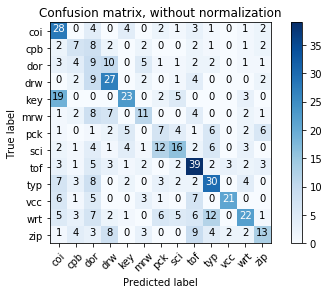

In [38]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names_short,
                      title='Confusion matrix, without normalization')

In [39]:
#report = metrics.classification_report(y_test, y_pred, target_names=class_names_short)
report = metrics.classification_report(y_test, y_pred)

In [40]:
report

'             precision    recall  f1-score   support\n\n          0       0.36      0.61      0.45        46\n          1       0.25      0.26      0.25        27\n          2       0.13      0.23      0.16        39\n          3       0.44      0.57      0.50        47\n          4       0.57      0.44      0.50        52\n          5       0.38      0.31      0.34        36\n          6       0.21      0.20      0.20        35\n          7       0.43      0.31      0.36        52\n          8       0.48      0.59      0.53        66\n          9       0.47      0.49      0.48        61\n         10       0.81      0.48      0.60        44\n         11       0.51      0.31      0.39        70\n         12       0.42      0.27      0.33        49\n\navg / total       0.44      0.41      0.41       624\n'

In [41]:
def classification_report_csv(report):
    report_data = []
    lines = report.split('\n')
    for line in lines[2:-3]:
        row = {}
        row_data = line.split('      ')
        row['class'] = row_data[0]
        row['precision'] = float(row_data[1])
        row['recall'] = float(row_data[2])
        row['f1_score'] = float(row_data[3])
        row['support'] = float(row_data[4])
        report_data.append(row)
    dataframe = pd.DataFrame.from_dict(report_data)
    dataframe.to_csv('classification_report_proba.csv', index = False)

classification_report_csv(report)